In [189]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt

In [190]:
beis_2013 = pd.read_csv('~/Documents/PhD/Projects/10. ELECSIM/run/beis_case_study/data/reference_run/2013_projection_1.csv')
beis_2013

,fuel_type,2013,2014,2015,2016,2017,2018
0,Coal,141.910063,129.498620,106.438559,59.721642,49.302771,46.541663
1,Coal and gas CCS,0.000000,0.000000,0.000000,0.000000,0.000000,4.704962
2,Oil,2.743753,2.849605,2.834165,2.840292,2.847358,2.839684
3,Gas,87.750011,89.482223,99.666714,131.734002,128.029583,117.497721
4,Nuclear,58.337824,58.337824,56.286179,56.286179,56.286179,56.286179
5,Renewables,30.594590,31.304995,34.156731,45.546462,54.839538,60.464802


In [191]:
beis_2013_long = pd.melt(beis_2013, id_vars='fuel_type')
beis_2013_long.loc[:,'variable'] = beis_2013_long.variable.astype(np.float)

beis_2013_long.head()


,fuel_type,variable,value
0,Coal,2013.0,141.910063
1,Coal and gas CCS,2013.0,0.000000
2,Oil,2013.0,2.743753
3,Gas,2013.0,87.750011
4,Nuclear,2013.0,58.337824


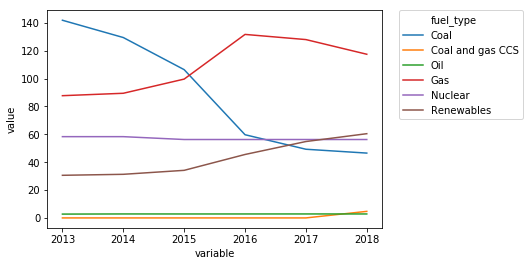

In [192]:
sns.lineplot(data=beis_2013_long, x='variable', y='value', hue='fuel_type')
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)


In [193]:
elecsim_run = pd.read_csv('~/Documents/PhD/Projects/10. ELECSIM/run/beis_case_study/data/reference_run/elecsim_projections.csv')
elecsim_run = elecsim_run[['year','type','run_id','value_perc','Technology','value']]

elecsim_run['type']=elecsim_run['type'].str.replace("Predicted","ElecSim")
elecsim_run = elecsim_run.dropna()

elecsim_run

,year,type,run_id,value_perc,Technology,value
0,2013.0,Actual,-1.0,43.311625,Coal,14355.798134
1,2013.0,Actual,-1.0,22.707588,Nuclear,7526.513864
2,2013.0,Actual,-1.0,27.563219,CCGT,9135.930888
3,2013.0,Actual,-1.0,6.417568,Wind,2127.126709
4,2013.0,Actual,-1.0,0.000000,Solar,0.000000
5,2013.0,ElecSim,0.0,28.278381,CCGT,7240.490877
6,2013.0,ElecSim,0.0,41.627760,Coal,10658.510366
7,2013.0,ElecSim,0.0,0.000000,Solar,0.000000
8,2013.0,ElecSim,0.0,25.358438,Nuclear,6492.859019
11,2013.0,ElecSim,0.0,4.565602,Wind,1168.992065


In [194]:
elecsim_run_wide = pd.pivot_table(elecsim_run.drop('value', axis=1), index=['year','type','run_id'], columns='Technology')
elecsim_run_wide.columns= elecsim_run_wide.columns.droplevel(0)
elecsim_run_wide = elecsim_run_wide.reset_index()
elecsim_run_wide['Renewables'] = elecsim_run_wide.Wind + elecsim_run_wide.Solar
elecsim_run_wide = elecsim_run_wide.drop(['Solar', 'Wind'], axis=1)
elecsim_renewables_long = pd.melt(elecsim_run_wide, id_vars=['year','type','run_id'])
elecsim_renewables_long = elecsim_renewables_long.rename(columns={'value': 'value_perc'})
elecsim_renewables_long.head()



,year,type,run_id,Technology,value_perc
0,2013.0,Actual,-1.0,CCGT,27.563219
1,2013.0,ElecSim,0.0,CCGT,28.278381
2,2013.0,ElecSim,1.0,CCGT,28.441960
3,2013.0,ElecSim,2.0,CCGT,27.201332
4,2013.0,ElecSim,3.0,CCGT,27.038093


In [195]:
def get_value_perc(df):
    df['value_perc'] = 100*df.value/df.value.sum()
    return df

beis_2013_long = beis_2013_long.rename(columns={"fuel_type":"Technology",'variable':'year'})
beis_2013_long  = beis_2013_long.groupby('year').apply(get_value_perc)
beis_2013_long['type'] = "BEIS"
beis_2013_long['run_id'] = -2
# beis_2013_long = beis_2013_long.drop("value", axis=1)
beis_2013_long.to_csv('/Users/b1017579/Documents/PhD/Projects/10. ELECSIM/notebooks/validation-optimisation/data/results/beis_forecasts.csv')
beis_2013_long


,Technology,year,value,value_perc,type,run_id
0,Coal,2013.0,141.910063,44.162483,BEIS,-2
1,Coal and gas CCS,2013.0,0.000000,0.000000,BEIS,-2
2,Oil,2013.0,2.743753,0.853857,BEIS,-2
3,Gas,2013.0,87.750011,27.307848,BEIS,-2
4,Nuclear,2013.0,58.337824,18.154760,BEIS,-2
5,Renewables,2013.0,30.594590,9.521052,BEIS,-2
6,Coal,2014.0,129.498620,41.576159,BEIS,-2
7,Coal and gas CCS,2014.0,0.000000,0.000000,BEIS,-2
8,Oil,2014.0,2.849605,0.914879,BEIS,-2
9,Gas,2014.0,89.482223,28.728701,BEIS,-2


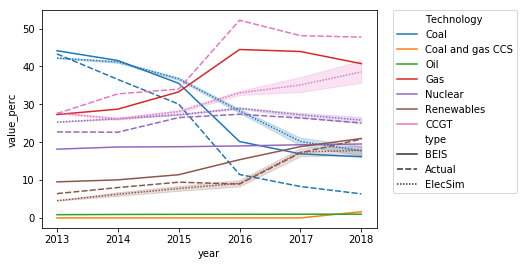

In [196]:
all_projections = beis_2013_long.append(elecsim_renewables_long)
sns.lineplot(data=all_projections, x='year', y='value_perc', style='type', hue='Technology')
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)


In [197]:
best_mix_year = pd.read_csv('~/Documents/PhD/Projects/10. ELECSIM/run/beis_case_study/data/reference_run/elecsim_projections_total')
contributed_results = best_mix_year.filter(regex='contributed_')

contributed_results['year'] = best_mix_year['year']
contributed_results['run_id'] = best_mix_year['run_id']

contributed_results = contributed_results.rename(columns={'contributed_PV': "contributed_solar"})
# contributed_results
cluster_size = pd.Series([22.0, 30.0, 32.0, 35.0, 43.0, 53.0, 68.0, 82.0])

contributed_results['contributed_Wind'] = contributed_results['contributed_Offshore'] +  contributed_results['contributed_Onshore']
contributed_results = contributed_results.drop(['contributed_Offshore', 'contributed_Onshore'], axis=1)
contributed_results

/Users/b1017579/.pyenv/versions/3.6.6/lib/python3.6/site-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  after removing the cwd from sys.path.
/Users/b1017579/.pyenv/versions/3.6.6/lib/python3.6/site-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """


,contributed_CCGT,contributed_Coal,contributed_solar,contributed_Nuclear,contributed_Recip_gas,contributed_Biomass,year,run_id,contributed_Wind
0,266003.28,294156.50,0.000000,163428.881549,1955.52,0,0,0,25065.358424
1,148954.32,296479.10,0.000000,163428.881549,0.00,0,0,0,25160.696785
2,267669.36,290201.76,0.000000,163428.881549,1955.52,0,0,0,23998.428168
3,296054.64,296054.08,0.000000,163428.881549,3259.20,0,0,0,25085.793678
4,121624.56,171715.19,0.000000,150520.394080,0.00,0,0,0,25016.756642
5,278110.80,309958.08,0.000000,163428.881549,3041.92,0,0,0,25160.696785
6,72714.96,227057.06,0.000000,142697.314049,0.00,0,0,0,29770.232393
7,112979.52,232963.10,0.000000,153559.549735,0.00,0,0,0,34811.535988
8,201065.04,283245.52,0.000000,163428.881549,1226.08,0,1,0,65137.917720
9,120926.88,250808.21,0.000000,163428.881549,0.00,0,1,0,65515.644615


In [198]:
def get_weighted_average(df):
#     print(df)
    year = df['year']
    run_id = df['run_id']
    df.apply(lambda x: x*cluster_size.values)
    df['run_id'] = run_id
    df['year'] = year
    return df
    #     return df.apply(lambda x: np.average(x, weights=cluster_size.values))

results_wa = contributed_results.groupby(['run_id','year']).apply(lambda x: get_weighted_average(x)).reset_index(drop=True)

results_wa

,contributed_CCGT,contributed_Coal,contributed_solar,contributed_Nuclear,contributed_Recip_gas,contributed_Biomass,year,run_id,contributed_Wind
0,266003.28,294156.50,0.000000,163428.881549,1955.52,0,0,0,25065.358424
1,148954.32,296479.10,0.000000,163428.881549,0.00,0,0,0,25160.696785
2,267669.36,290201.76,0.000000,163428.881549,1955.52,0,0,0,23998.428168
3,296054.64,296054.08,0.000000,163428.881549,3259.20,0,0,0,25085.793678
4,121624.56,171715.19,0.000000,150520.394080,0.00,0,0,0,25016.756642
5,278110.80,309958.08,0.000000,163428.881549,3041.92,0,0,0,25160.696785
6,72714.96,227057.06,0.000000,142697.314049,0.00,0,0,0,29770.232393
7,112979.52,232963.10,0.000000,153559.549735,0.00,0,0,0,34811.535988
8,201065.04,283245.52,0.000000,163428.881549,1226.08,0,1,0,65137.917720
9,120926.88,250808.21,0.000000,163428.881549,0.00,0,1,0,65515.644615


In [199]:
def sum_years(df):
    year = df['year'].iloc[0]
    run_id = df['run_id'].iloc[0]
    sum_df = df.sum()
    sum_df.year=year
    sum_df.run_id=run_id
    return sum_df
    

elecsim_summed = results_wa.groupby(["year",'run_id']).apply(sum_years)
elecsim_summed

contributed_CCGT  contributed_Coal  contributed_solar  \
year run_id                                                          
0    0             1564111.44        2118584.87           0.000000   
     1             1560672.00        2137416.10           0.000000   
     2             1505812.32        2166440.70           0.000000   
     3             1486481.04        2174065.78           0.000000   
     4             1532460.96        2147703.48           0.000000   
     5             1536582.96        2141165.44           0.000000   
     6             1531740.96        2161944.02           0.000000   
     7             1522641.60        2159807.86           0.000000   
     8             1502758.80        2178013.41           0.000000   
     9             1532363.76        2166022.00           0.000000   
     10            1589187.60        2099510.32           0.000000   
     11            1529337.60        2146561.93           0.000000   
     12            1553754.24        2117242.66           0.000000   
     13            1517963.76        2157757.02           0.000000   
     14            1521988.56        2148096.90           0.000000   
     15            1526508.00        2161093.98           0.000000   
     16            1533892.32        2147108.61           0.000000   
     17            1493800.56        2159998.25           0.000000   
     18            1510814.16        2163448.97           0.000000   
     19            1518745.68        2169820.32           0.000000   
     20            1503198.72        2163729.42           0.000000   
     21            1514056.32        2172166.62           0.000000   
     22            1539262.08        2149588.42           0.000000   
     23            1510186.32        2161680.16           0.000000   
     24            1570561.20        2117343.78           0.000000   
     25            1527572.88        2158181.25           0.000000   
     26            1498365.36        2168954.48           0.000000   
     27            1535560.56        2161573.51           0.000000   
     28            1497193.20        2157829.70           0.000000   
     29            1498117.68        2187374.12           0.000000   
...                       ...               ...                ...   
5    66            6036352.56         544588.08       60968.892456   
     67            1573463.04        1027527.58      180280.826200   
     68            1790830.13         573479.96       22221.008640   
     69            2146116.48         587605.95      265803.820808   
     70            1245252.99         935096.15       34581.444696   
     71            1235232.77         905936.91       36525.782952   
     72            1310773.44        1221627.12       68885.126784   
     73            1726608.48         701939.82       16110.231264   
     74            1939302.90         549381.74      187098.644208   
     75            1347982.16         803603.85       40831.103376   
     76            1325333.52         925454.19       37359.070776   
     77            1503922.06         579812.69       23054.296464   
     78            6945482.59         364483.88       38331.239904   
     79            1234758.64         766910.67       34164.800784   
     80            1205130.96        1062947.81      199225.446304   
     81            2566522.50         486229.20      296689.278304   
     82            1610239.94         835438.43       42219.916416   
     83            1250388.65         946335.47       55552.521600   
     84            3149815.77        1015755.31       61385.536368   
     85            1520728.56         913377.16      214038.466616   
     86            1342291.91         845516.26       57774.622464   
     87            1214566.56        1016399.78       32637.106440   
     88            5375451.82         540238.27       30276.124272   
     89            1066615.68         968658.99       59302.316808   
     90            1266

In [200]:

hist_long = pd.melt(elecsim_summed, id_vars=["run_id", "year"])
hist_long

,run_id,year,variable,value
0,0.0,0.0,contributed_CCGT,1.564111e+06
1,1.0,0.0,contributed_CCGT,1.560672e+06
2,2.0,0.0,contributed_CCGT,1.505812e+06
3,3.0,0.0,contributed_CCGT,1.486481e+06
4,4.0,0.0,contributed_CCGT,1.532461e+06
5,5.0,0.0,contributed_CCGT,1.536583e+06
6,6.0,0.0,contributed_CCGT,1.531741e+06
7,7.0,0.0,contributed_CCGT,1.522642e+06
8,8.0,0.0,contributed_CCGT,1.502759e+06
9,9.0,0.0,contributed_CCGT,1.532364e+06


In [201]:
hist_long['variable'] = hist_long.variable.str.split("_").str[-1].str.lower()
hist_long['year'] = hist_long['year'] + 2013
hist_long

,run_id,year,variable,value
0,0.0,2013.0,ccgt,1.564111e+06
1,1.0,2013.0,ccgt,1.560672e+06
2,2.0,2013.0,ccgt,1.505812e+06
3,3.0,2013.0,ccgt,1.486481e+06
4,4.0,2013.0,ccgt,1.532461e+06
5,5.0,2013.0,ccgt,1.536583e+06
6,6.0,2013.0,ccgt,1.531741e+06
7,7.0,2013.0,ccgt,1.522642e+06
8,8.0,2013.0,ccgt,1.502759e+06
9,9.0,2013.0,ccgt,1.532364e+06


In [202]:
def get_mix(df):
    print(df)
    df['value_perc'] = df['value']/sum(df['value'])*100
    return df

hist_long_perc = hist_long.groupby(['year','run_id']).apply(lambda x: get_mix(x))
hist_long_perc = hist_long_perc.rename(columns={"type":"Type", "variable":'Technology'})
hist_long_perc['Technology'] = hist_long_perc['Technology'].map({'coal': "Coal", 'ccgt': "CCGT", 'nuclear':"Nuclear", "wind":"Wind","solar":"Solar"})
hist_long_perc

      run_id    year variable         value
0        0.0  2013.0     ccgt  1.564111e+06
576      0.0  2013.0     coal  2.118585e+06
1152     0.0  2013.0    solar  0.000000e+00
1728     0.0  2013.0  nuclear  1.263922e+06
2304     0.0  2013.0      gas  1.021216e+04
2880     0.0  2013.0  biomass  0.000000e+00
3456     0.0  2013.0     wind  2.140695e+05
      run_id    year variable         value
0        0.0  2013.0     ccgt  1.564111e+06
576      0.0  2013.0     coal  2.118585e+06
1152     0.0  2013.0    solar  0.000000e+00
1728     0.0  2013.0  nuclear  1.263922e+06
2304     0.0  2013.0      gas  1.021216e+04
2880     0.0  2013.0  biomass  0.000000e+00
3456     0.0  2013.0     wind  2.140695e+05
      run_id    year variable         value
1        1.0  2013.0     ccgt  1.560672e+06
577      1.0  2013.0     coal  2.137416e+06
1153     1.0  2013.0    solar  0.000000e+00
1729     1.0  2013.0  nuclear  1.262709e+06
2305     1.0  2013.0      gas  9.668960e+03
2881     1.0  2013.0  biomass  0

      run_id    year variable         value
24      24.0  2013.0     ccgt  1.570561e+06
600     24.0  2013.0     coal  2.117344e+06
1176    24.0  2013.0    solar  0.000000e+00
1752    24.0  2013.0  nuclear  1.263199e+06
2328    24.0  2013.0      gas  1.024126e+04
2904    24.0  2013.0  biomass  0.000000e+00
3480    24.0  2013.0     wind  2.140695e+05
      run_id    year variable         value
25      25.0  2013.0     ccgt  1.527573e+06
601     25.0  2013.0     coal  2.158181e+06
1177    25.0  2013.0    solar  0.000000e+00
1753    25.0  2013.0  nuclear  1.263922e+06
2329    25.0  2013.0      gas  1.023156e+04
2905    25.0  2013.0  biomass  0.000000e+00
3481    25.0  2013.0     wind  2.140695e+05
      run_id    year variable         value
26      26.0  2013.0     ccgt  1.498365e+06
602     26.0  2013.0     coal  2.168954e+06
1178    26.0  2013.0    solar  0.000000e+00
1754    26.0  2013.0  nuclear  1.263560e+06
2330    26.0  2013.0      gas  1.076506e+04
2906    26.0  2013.0  biomass  0

      run_id    year variable         value
67      67.0  2013.0     ccgt  1.556223e+06
643     67.0  2013.0     coal  2.119438e+06
1219    67.0  2013.0    solar  0.000000e+00
1795    67.0  2013.0  nuclear  1.261380e+06
2371    67.0  2013.0      gas  1.021216e+04
2947    67.0  2013.0  biomass  0.000000e+00
3523    67.0  2013.0     wind  2.140369e+05
      run_id    year variable         value
68      68.0  2013.0     ccgt  1.541028e+06
644     68.0  2013.0     coal  2.178679e+06
1220    68.0  2013.0    solar  0.000000e+00
1796    68.0  2013.0  nuclear  1.248935e+06
2372    68.0  2013.0      gas  1.021216e+04
2948    68.0  2013.0  biomass  0.000000e+00
3524    68.0  2013.0     wind  2.138681e+05
      run_id    year variable         value
69      69.0  2013.0     ccgt  1.508562e+06
645     69.0  2013.0     coal  2.172482e+06
1221    69.0  2013.0    solar  0.000000e+00
1797    69.0  2013.0  nuclear  1.263922e+06
2373    69.0  2013.0      gas  1.021216e+04
2949    69.0  2013.0  biomass  0

      run_id    year variable         value
100      4.0  2014.0     ccgt  1.380174e+06
676      4.0  2014.0     coal  2.067847e+06
1252     4.0  2014.0    solar  0.000000e+00
1828     4.0  2014.0  nuclear  1.255425e+06
2404     4.0  2014.0      gas  7.909380e+03
2980     4.0  2014.0  biomass  0.000000e+00
3556     4.0  2014.0     wind  2.135465e+05
      run_id    year variable         value
101      5.0  2014.0     ccgt  1.336501e+06
677      5.0  2014.0     coal  1.932635e+06
1253     5.0  2014.0    solar  0.000000e+00
1829     5.0  2014.0  nuclear  1.231632e+06
2405     5.0  2014.0      gas  7.769700e+03
2981     5.0  2014.0  biomass  0.000000e+00
3557     5.0  2014.0     wind  4.200740e+05
      run_id    year variable         value
102      6.0  2014.0     ccgt  1.373786e+06
678      6.0  2014.0     coal  2.053366e+06
1254     6.0  2014.0    solar  0.000000e+00
1830     6.0  2014.0  nuclear  1.253756e+06
2406     6.0  2014.0      gas  8.582560e+03
2982     6.0  2014.0  biomass  0

      run_id    year variable         value
136     40.0  2014.0     ccgt  1.400192e+06
712     40.0  2014.0     coal  2.020039e+06
1288    40.0  2014.0    solar  0.000000e+00
1864    40.0  2014.0  nuclear  1.244895e+06
2440    40.0  2014.0      gas  8.582560e+03
3016    40.0  2014.0  biomass  0.000000e+00
3592    40.0  2014.0     wind  2.228783e+05
      run_id    year variable         value
137     41.0  2014.0     ccgt  1.345182e+06
713     41.0  2014.0     coal  2.062542e+06
1289    41.0  2014.0    solar  0.000000e+00
1865    41.0  2014.0  nuclear  1.251572e+06
2441    41.0  2014.0      gas  7.839540e+03
3017    41.0  2014.0  biomass  0.000000e+00
3593    41.0  2014.0     wind  2.533905e+05
      run_id    year variable         value
138     42.0  2014.0     ccgt  1.460021e+06
714     42.0  2014.0     coal  1.929080e+06
1290    42.0  2014.0    solar  0.000000e+00
1866    42.0  2014.0  nuclear  1.252589e+06
2442    42.0  2014.0      gas  8.925940e+03
3018    42.0  2014.0  biomass  0

      run_id    year variable         value
170     74.0  2014.0     ccgt  1.219570e+06
746     74.0  2014.0     coal  2.063933e+06
1322    74.0  2014.0    solar  0.000000e+00
1898    74.0  2014.0  nuclear  1.232502e+06
2474    74.0  2014.0      gas  7.769700e+03
3050    74.0  2014.0  biomass  0.000000e+00
3626    74.0  2014.0     wind  3.964722e+05
      run_id    year variable         value
171     75.0  2014.0     ccgt  1.391296e+06
747     75.0  2014.0     coal  2.000932e+06
1323    75.0  2014.0    solar  0.000000e+00
1899    75.0  2014.0  nuclear  1.247426e+06
2475    75.0  2014.0      gas  8.402140e+03
3051    75.0  2014.0  biomass  0.000000e+00
3627    75.0  2014.0     wind  2.556519e+05
      run_id    year variable         value
172     76.0  2014.0     ccgt  1.320827e+06
748     76.0  2014.0     coal  1.987890e+06
1324    76.0  2014.0    solar  0.000000e+00
1900    76.0  2014.0  nuclear  1.234463e+06
2476    76.0  2014.0      gas  7.829840e+03
3052    76.0  2014.0  biomass  0

      run_id    year variable         value
205     13.0  2015.0     ccgt  1.312845e+06
781     13.0  2015.0     coal  1.558074e+06
1357    13.0  2015.0    solar  0.000000e+00
1933    13.0  2015.0  nuclear  1.203270e+06
2509    13.0  2015.0      gas  7.185760e+03
3085    13.0  2015.0  biomass  0.000000e+00
3661    13.0  2015.0     wind  5.936243e+05
      run_id    year variable         value
206     14.0  2015.0     ccgt  1.519464e+06
782     14.0  2015.0     coal  1.651046e+06
1358    14.0  2015.0    solar  0.000000e+00
1934    14.0  2015.0  nuclear  1.252228e+06
2510    14.0  2015.0      gas  8.351700e+03
3086    14.0  2015.0  biomass  0.000000e+00
3662    14.0  2015.0     wind  2.176012e+05
      run_id    year variable         value
207     15.0  2015.0     ccgt  1.442612e+06
783     15.0  2015.0     coal  1.694877e+06
1359    15.0  2015.0    solar  0.000000e+00
1935    15.0  2015.0  nuclear  1.248321e+06
2511    15.0  2015.0      gas  9.488540e+03
3087    15.0  2015.0  biomass  0

      run_id    year variable         value
237     45.0  2015.0     ccgt  1.320152e+06
813     45.0  2015.0     coal  1.832176e+06
1389    45.0  2015.0    solar  0.000000e+00
1965    45.0  2015.0  nuclear  1.247960e+06
2541    45.0  2015.0      gas  7.808500e+03
3117    45.0  2015.0  biomass  0.000000e+00
3693    45.0  2015.0     wind  2.585758e+05
      run_id    year variable         value
238     46.0  2015.0     ccgt  1.254028e+06
814     46.0  2015.0     coal  1.708339e+06
1390    46.0  2015.0    solar  0.000000e+00
1966    46.0  2015.0  nuclear  1.216504e+06
2542    46.0  2015.0      gas  8.382740e+03
3118    46.0  2015.0  biomass  0.000000e+00
3694    46.0  2015.0     wind  5.026472e+05
      run_id    year variable         value
239     47.0  2015.0     ccgt  1.298614e+06
815     47.0  2015.0     coal  1.790153e+06
1391    47.0  2015.0    solar  0.000000e+00
1967    47.0  2015.0  nuclear  1.235889e+06
2543    47.0  2015.0      gas  7.036380e+03
3119    47.0  2015.0  biomass  0

      run_id    year variable         value
262     70.0  2015.0     ccgt  1.413637e+06
838     70.0  2015.0     coal  1.672932e+06
1414    70.0  2015.0    solar  0.000000e+00
1990    70.0  2015.0  nuclear  1.238310e+06
2566    70.0  2015.0      gas  8.281860e+03
3142    70.0  2015.0  biomass  0.000000e+00
3718    70.0  2015.0     wind  3.246151e+05
      run_id    year variable         value
263     71.0  2015.0     ccgt  1.379814e+06
839     71.0  2015.0     coal  1.779182e+06
1415    71.0  2015.0    solar  0.000000e+00
1991    71.0  2015.0  nuclear  1.249847e+06
2567    71.0  2015.0      gas  7.779400e+03
3143    71.0  2015.0  biomass  0.000000e+00
3719    71.0  2015.0     wind  2.444978e+05
      run_id    year variable         value
264     72.0  2015.0     ccgt  1.362758e+06
840     72.0  2015.0     coal  1.755339e+06
1416    72.0  2015.0    solar  0.000000e+00
1992    72.0  2015.0  nuclear  1.244782e+06
2568    72.0  2015.0      gas  8.380800e+03
3144    72.0  2015.0  biomass  0

      run_id    year variable         value
288      0.0  2016.0     ccgt  1.476387e+06
864      0.0  2016.0     coal  1.052164e+06
1440     0.0  2016.0    solar  0.000000e+00
2016     0.0  2016.0  nuclear  1.197670e+06
2592     0.0  2016.0      gas  2.928818e+04
3168     0.0  2016.0  biomass  0.000000e+00
3744     0.0  2016.0     wind  6.184678e+05
      run_id    year variable         value
289      1.0  2016.0     ccgt  1.534716e+06
865      1.0  2016.0     coal  1.154142e+06
1441     1.0  2016.0    solar  0.000000e+00
2017     1.0  2016.0  nuclear  1.222975e+06
2593     1.0  2016.0      gas  3.505192e+04
3169     1.0  2016.0  biomass  0.000000e+00
3745     1.0  2016.0     wind  4.018036e+05
      run_id    year variable         value
290      2.0  2016.0     ccgt  1.327759e+06
866      2.0  2016.0     coal  1.299849e+06
1442     2.0  2016.0    solar  0.000000e+00
2018     2.0  2016.0  nuclear  1.208320e+06
2594     2.0  2016.0      gas  2.908254e+04
3170     2.0  2016.0  biomass  0

3771    27.0  2016.0     wind  2.152490e+05
      run_id    year variable         value
316     28.0  2016.0     ccgt  1.379993e+06
892     28.0  2016.0     coal  1.169010e+06
1468    28.0  2016.0    solar  0.000000e+00
2044    28.0  2016.0  nuclear  1.200189e+06
2620    28.0  2016.0      gas  3.000598e+04
3196    28.0  2016.0  biomass  0.000000e+00
3772    28.0  2016.0     wind  5.774607e+05
      run_id    year variable         value
317     29.0  2016.0     ccgt  1.675881e+06
893     29.0  2016.0     coal  1.045091e+06
1469    29.0  2016.0    solar  0.000000e+00
2045    29.0  2016.0  nuclear  1.226811e+06
2621    29.0  2016.0      gas  3.672614e+04
3197    29.0  2016.0  biomass  0.000000e+00
3773    29.0  2016.0     wind  3.547147e+05
      run_id    year variable         value
318     30.0  2016.0     ccgt  1.524966e+06
894     30.0  2016.0     coal  1.146695e+06
1470    30.0  2016.0    solar  0.000000e+00
2046    30.0  2016.0  nuclear  1.219688e+06
2622    30.0  2016.0      gas  3

3807    63.0  2016.0     wind  2.566961e+05
      run_id    year variable         value
352     64.0  2016.0     ccgt  1.481270e+06
928     64.0  2016.0     coal  1.364123e+06
1504    64.0  2016.0    solar  0.000000e+00
2080    64.0  2016.0  nuclear  1.245931e+06
2656    64.0  2016.0      gas  2.843846e+04
3232    64.0  2016.0  biomass  0.000000e+00
3808    64.0  2016.0     wind  2.297823e+05
      run_id    year variable         value
353     65.0  2016.0     ccgt  1.368653e+06
929     65.0  2016.0     coal  1.472867e+06
1505    65.0  2016.0    solar  0.000000e+00
2081    65.0  2016.0  nuclear  1.242914e+06
2657    65.0  2016.0      gas  2.647518e+04
3233    65.0  2016.0  biomass  0.000000e+00
3809    65.0  2016.0     wind  2.540030e+05
      run_id    year variable         value
354     66.0  2016.0     ccgt  1.605736e+06
930     66.0  2016.0     coal  1.195925e+06
1506    66.0  2016.0    solar  0.000000e+00
2082    66.0  2016.0  nuclear  1.242626e+06
2658    66.0  2016.0      gas  3

3839    95.0  2016.0     wind  5.978755e+05
      run_id    year variable         value
384      0.0  2017.0     ccgt  1.312928e+06
960      0.0  2017.0     coal  8.089285e+05
1536     0.0  2017.0    solar  3.166494e+04
2112     0.0  2017.0  nuclear  1.163007e+06
2688     0.0  2017.0      gas  5.175920e+03
3264     0.0  2017.0  biomass  0.000000e+00
3840     0.0  2017.0     wind  9.146319e+05
      run_id    year variable         value
385      1.0  2017.0     ccgt  1.559436e+06
961      1.0  2017.0     coal  8.134995e+05
1537     1.0  2017.0    solar  1.352132e+05
2113     1.0  2017.0  nuclear  1.189650e+06
2689     1.0  2017.0      gas  4.623020e+03
3265     1.0  2017.0  biomass  0.000000e+00
3841     1.0  2017.0     wind  4.892553e+05
      run_id    year variable         value
386      2.0  2017.0     ccgt  1.182033e+06
962      2.0  2017.0     coal  9.808334e+05
1538     2.0  2017.0    solar  2.208213e+04
2114     2.0  2017.0  nuclear  1.167606e+06
2690     2.0  2017.0      gas  4

      run_id    year variable         value
408     24.0  2017.0     ccgt  1.551150e+06
984     24.0  2017.0     coal  8.783074e+05
1560    24.0  2017.0    solar  1.404267e+05
2136    24.0  2017.0  nuclear  1.188014e+06
2712    24.0  2017.0      gas  4.976100e+03
3288    24.0  2017.0  biomass  0.000000e+00
3864    24.0  2017.0     wind  4.939801e+05
      run_id    year variable         value
409     25.0  2017.0     ccgt  1.280596e+06
985     25.0  2017.0     coal  1.017391e+06
1561    25.0  2017.0    solar  5.763574e+04
2137    25.0  2017.0  nuclear  1.181366e+06
2713    25.0  2017.0      gas  5.730760e+03
3289    25.0  2017.0  biomass  0.000000e+00
3865    25.0  2017.0     wind  6.350667e+05
      run_id    year variable         value
410     26.0  2017.0     ccgt  1.441682e+06
986     26.0  2017.0     coal  9.647313e+05
1562    26.0  2017.0    solar  1.911120e+05
2138    26.0  2017.0  nuclear  1.194062e+06
2714    26.0  2017.0      gas  1.102502e+04
3290    26.0  2017.0  biomass  0

3897    57.0  2017.0     wind  3.511118e+05
      run_id    year variable         value
442     58.0  2017.0     ccgt  1.052779e+06
1018    58.0  2017.0     coal  9.627655e+05
1594    58.0  2017.0    solar  4.513642e+04
2170    58.0  2017.0  nuclear  1.145160e+06
2746    58.0  2017.0      gas  4.985800e+03
3322    58.0  2017.0  biomass  0.000000e+00
3898    58.0  2017.0     wind  1.028916e+06
      run_id    year variable         value
443     59.0  2017.0     ccgt  1.489676e+06
1019    59.0  2017.0     coal  9.627017e+05
1595    59.0  2017.0    solar  2.164113e+05
2171    59.0  2017.0  nuclear  1.194913e+06
2747    59.0  2017.0      gas  8.000560e+03
3323    59.0  2017.0  biomass  0.000000e+00
3899    59.0  2017.0     wind  3.527561e+05
      run_id    year variable         value
444     60.0  2017.0     ccgt  1.371739e+06
1020    60.0  2017.0     coal  8.319556e+05
1596    60.0  2017.0    solar  3.430368e+04
2172    60.0  2017.0  nuclear  1.168489e+06
2748    60.0  2017.0      gas  2

      run_id    year variable         value
476     92.0  2017.0     ccgt  1.276624e+06
1052    92.0  2017.0     coal  1.126547e+06
1628    92.0  2017.0    solar  5.277490e+04
2204    92.0  2017.0  nuclear  1.187886e+06
2780    92.0  2017.0      gas  6.202180e+03
3356    92.0  2017.0  biomass  0.000000e+00
3932    92.0  2017.0     wind  5.600210e+05
      run_id    year variable         value
477     93.0  2017.0     ccgt  1.491274e+06
1053    93.0  2017.0     coal  9.521872e+05
1629    93.0  2017.0    solar  1.625153e+05
2205    93.0  2017.0  nuclear  1.198004e+06
2781    93.0  2017.0      gas  5.899540e+03
3357    93.0  2017.0  biomass  0.000000e+00
3933    93.0  2017.0     wind  3.865148e+05
      run_id    year variable         value
478     94.0  2017.0     ccgt  1.572209e+06
1054    94.0  2017.0     coal  6.935837e+05
1630    94.0  2017.0    solar  7.777353e+04
2206    94.0  2017.0  nuclear  1.173451e+06
2782    94.0  2017.0      gas  4.976100e+03
3358    94.0  2017.0  biomass  0

3977    41.0  2018.0     wind  6.705142e+05
      run_id    year variable         value
522     42.0  2018.0     ccgt  1.368489e+06
1098    42.0  2018.0     coal  6.594548e+05
1674    42.0  2018.0    solar  3.541473e+04
2250    42.0  2018.0  nuclear  1.147700e+06
2826    42.0  2018.0      gas  0.000000e+00
3402    42.0  2018.0  biomass  0.000000e+00
3978    42.0  2018.0     wind  9.734242e+05
      run_id    year variable         value
523     43.0  2018.0     ccgt  1.300735e+07
1099    43.0  2018.0     coal  1.841759e+05
1675    43.0  2018.0    solar  5.805239e+04
2251    43.0  2018.0  nuclear  1.211828e+06
2827    43.0  2018.0      gas  0.000000e+00
3403    43.0  2018.0  biomass  0.000000e+00
3979    43.0  2018.0     wind  3.535165e+05
      run_id    year variable         value
524     44.0  2018.0     ccgt  1.129648e+06
1100    44.0  2018.0     coal  1.011108e+06
1676    44.0  2018.0    solar  8.190756e+04
2252    44.0  2018.0  nuclear  1.171859e+06
2828    44.0  2018.0      gas  5

4001    65.0  2018.0     wind  3.824044e+05
      run_id    year variable         value
546     66.0  2018.0     ccgt  6.036353e+06
1122    66.0  2018.0     coal  5.445881e+05
1698    66.0  2018.0    solar  6.096889e+04
2274    66.0  2018.0  nuclear  1.215945e+06
2850    66.0  2018.0      gas  0.000000e+00
3426    66.0  2018.0  biomass  0.000000e+00
4002    66.0  2018.0     wind  3.098598e+05
      run_id    year variable         value
547     67.0  2018.0     ccgt  1.573463e+06
1123    67.0  2018.0     coal  1.027528e+06
1699    67.0  2018.0    solar  1.802808e+05
2275    67.0  2018.0  nuclear  1.191784e+06
2851    67.0  2018.0      gas  0.000000e+00
3427    67.0  2018.0  biomass  0.000000e+00
4003    67.0  2018.0     wind  4.279410e+05
      run_id    year variable         value
548     68.0  2018.0     ccgt  1.790830e+06
1124    68.0  2018.0     coal  5.734800e+05
1700    68.0  2018.0    solar  2.222101e+04
2276    68.0  2018.0  nuclear  1.173431e+06
2852    68.0  2018.0      gas  0

4026    90.0  2018.0     wind  9.165415e+05
      run_id    year variable         value
571     91.0  2018.0     ccgt  1.210569e+06
1147    91.0  2018.0     coal  9.069026e+05
1723    91.0  2018.0    solar  1.425292e+05
2299    91.0  2018.0  nuclear  1.165682e+06
2875    91.0  2018.0      gas  0.000000e+00
3451    91.0  2018.0  biomass  0.000000e+00
4027    91.0  2018.0     wind  6.898760e+05
      run_id    year variable         value
572     92.0  2018.0     ccgt  1.133532e+06
1148    92.0  2018.0     coal  1.058429e+06
1724    92.0  2018.0    solar  6.194106e+04
2300    92.0  2018.0  nuclear  1.176509e+06
2876    92.0  2018.0      gas  0.000000e+00
3452    92.0  2018.0  biomass  0.000000e+00
4028    92.0  2018.0     wind  6.404697e+05
      run_id    year variable         value
573     93.0  2018.0     ccgt  1.971954e+06
1149    93.0  2018.0     coal  9.397493e+05
1725    93.0  2018.0    solar  1.627864e+05
2301    93.0  2018.0  nuclear  1.190015e+06
2877    93.0  2018.0      gas  0

,run_id,year,Technology,value,value_perc
0,0.0,2013.0,CCGT,1.564111e+06,30.248343
1,1.0,2013.0,CCGT,1.560672e+06,30.102445
2,2.0,2013.0,CCGT,1.505812e+06,29.190438
3,3.0,2013.0,CCGT,1.486481e+06,28.867616
4,4.0,2013.0,CCGT,1.532461e+06,29.652789
5,5.0,2013.0,CCGT,1.536583e+06,29.750992
6,6.0,2013.0,CCGT,1.531741e+06,29.611931
7,7.0,2013.0,CCGT,1.522642e+06,29.447763
8,8.0,2013.0,CCGT,1.502759e+06,29.072662
9,9.0,2013.0,CCGT,1.532364e+06,29.591326


In [203]:
hist_long_perc = hist_long_perc.dropna()
# hist_long_perc = hist_long_perc.drop('index', axis=1)
hist_long_perc['type']='ElecSim'
hist_long_perc
both = hist_long_perc.append(elecsim_run[elecsim_run.type=="Actual"])
both = both.reset_index(drop=True)
both

/Users/b1017579/.pyenv/versions/3.6.6/lib/python3.6/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until


,Technology,run_id,type,value,value_perc,year
0,CCGT,0.0,ElecSim,1.564111e+06,30.248343,2013.0
1,CCGT,1.0,ElecSim,1.560672e+06,30.102445,2013.0
2,CCGT,2.0,ElecSim,1.505812e+06,29.190438,2013.0
3,CCGT,3.0,ElecSim,1.486481e+06,28.867616,2013.0
4,CCGT,4.0,ElecSim,1.532461e+06,29.652789,2013.0
5,CCGT,5.0,ElecSim,1.536583e+06,29.750992,2013.0
6,CCGT,6.0,ElecSim,1.531741e+06,29.611931,2013.0
7,CCGT,7.0,ElecSim,1.522642e+06,29.447763,2013.0
8,CCGT,8.0,ElecSim,1.502759e+06,29.072662,2013.0
9,CCGT,9.0,ElecSim,1.532364e+06,29.591326,2013.0


In [204]:
# both.year = both.year.astype(int)

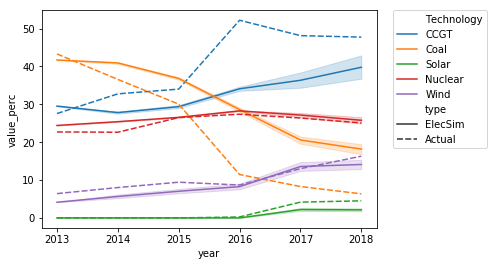

In [205]:
sns.lineplot(data=both, x='year', y='value_perc', hue='Technology', style='type')
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)


In [206]:
beis_2013_long.loc[:,"value"] = beis_2013_long.loc[:,"value"]*100

In [207]:
beis_2013_long

,Technology,year,value,value_perc,type,run_id
0,Coal,2013.0,14191.006300,44.162483,BEIS,-2
1,Coal and gas CCS,2013.0,0.000000,0.000000,BEIS,-2
2,Oil,2013.0,274.375291,0.853857,BEIS,-2
3,Gas,2013.0,8775.001115,27.307848,BEIS,-2
4,Nuclear,2013.0,5833.782392,18.154760,BEIS,-2
5,Renewables,2013.0,3059.459009,9.521052,BEIS,-2
6,Coal,2014.0,12949.862000,41.576159,BEIS,-2
7,Coal and gas CCS,2014.0,0.000000,0.000000,BEIS,-2
8,Oil,2014.0,284.960471,0.914879,BEIS,-2
9,Gas,2014.0,8948.222322,28.728701,BEIS,-2


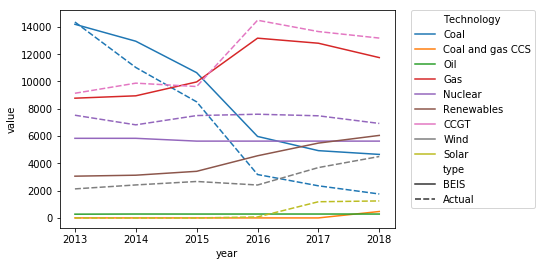

In [210]:
beis_actual = beis_2013_long.append(elecsim_run[elecsim_run.type=="Actual"])
beis_actual
sns.lineplot(data=beis_actual, x='year', y='value', style="type", hue='Technology')
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)


# 2018-2035 Projections

In [214]:
beis_2035 = pd.read_csv('~/Documents/PhD/Projects/10. ELECSIM/run/beis_case_study/data/reference_run/2018-2035-beis.csv')
beis_2035.head()

,fuel_type,2018,2019,2020,2021,2022,2023,2024,2025,2026,2027,2028,2029,2030,2031,2032,2033,2034,2035
0,Coal,8,2,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0
1,Coal and natural gas CCS,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,7
2,Oil,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,Natural gas,119,106,100,81,73,80,75,77,72,78,76,71,66,58,49,46,41,34
4,Nuclear,57,59,59,59,59,53,36,40,53,56,65,72,64,69,81,81,92,104


In [218]:
beis_2035_long = pd.melt(beis_2035, id_vars='fuel_type')
beis_2035_long.head()

,fuel_type,variable,value
0,Coal,2018,8
1,Coal and natural gas CCS,2018,0
2,Oil,2018,0
3,Natural gas,2018,119
4,Nuclear,2018,57


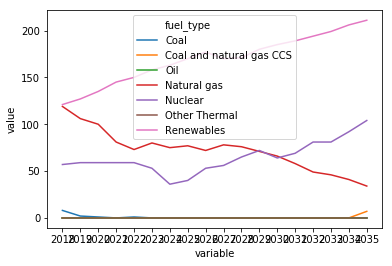

In [220]:
sns.lineplot(data=beis_2035_long, x='variable', y='value', hue='fuel_type')